<a href="https://colab.research.google.com/github/AnselmeId/appm-4600-numerics/blob/main/Labs/Lab08_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8: Interpolation

Learning objectives:
- Explore interpolation conceptually, **not** focusing on formulas like the Barycentric formula nor Newton's divided differences
- Visualize how Lagrange polynomials work
- If the data $y$ are generated by $y=f(x)$, and we interpolate with a polynomial $p$, then we have an error $e(x) = f(x)-p(x)$
  - Explore where (in the $x$ domain) the error is the highest
  - Consider using nonuniformly spaced $x$ nodes and see the effect on error
  - If we refine with $n\to \infty$, does $|e(x)|$ get smaller? Is this true for some functions but not others? What properties of the functions might affect it?
- Understand that polynomial interpolation comes down to linear algebra
  - The Vandermonde matrices for a given basis are useful (even if our practical formulas avoid forming/solving them explicitly)

Tasks:
1. Lagrange interpolation "by hand"
2. Trying different node locations: uniform or nonuniform (clustered near edges)
3. Look at the error formula for 3 functions, $f(x)=e^{-x}$, $f(x)=\frac{1}{1+x^2}$, and $f(x)=|x|$.
4. Make Vandermonde matrices by hand; solve for the coefficients; and create the polynomial

*If you are super speedy and finish everything quickly, then look into https://github.com/chebpy/chebpy, a Python wrapper for [chebfun](https://www.chebfun.org/), which is a numerical package (originally in Matlab) for defining functions via their polynomial interpolants (using the [Chebyshev polynomial basis](https://en.wikipedia.org/wiki/Chebyshev_polynomials) )*

**Deliverables**

Turn in a **single PDF** with the following items:
- from Task 1, a plot of the $k=2$ Lagrange polynomial for the given nodes described in that task
- from Task 2, a plot of the error, for $n=9$, for both uniform and nonuniform nodes (combined onto a single plot)
- from Task 3, a sentence commenting on your results (if you finished) or speculation on what your results would be (if you didn't finish)

No deliverables from Task 4 are required

APPM 4600. Copyright Department of Applied Mathematics, University of Colorado Boulder. Released under a BSD 3-clause license

In [18]:
import numpy as np
import scipy.interpolate
import sympy
from   matplotlib import pyplot as plt

## Part 1: Lagrange interpolation "by hand"
We'll do Lagrange interpolation, but do it manually, not using the Barycentric formula. This is for illustrative purposes

Use the `xData` and `yData` points given below (both of length 5). Create a Python function that returns the $k^\text{th}$ Lagrange polynomial (for $k=0,1,2,3,4$) for these `xData` nodes.  Plot the $k=2$ polynomial (evaluating it at 50 points) in the range $[1,5]$.

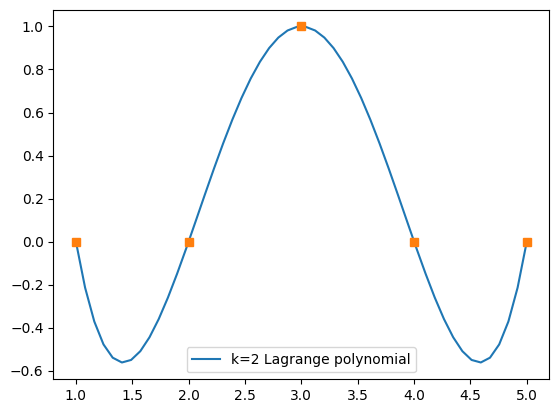

In [24]:
xData = np.arange(1,6)
yData = np.array( [3.1, 1.6, 3.5, 4.6, 5.8])

# Or, another way
def L(x,k):
  """ returns the value of the kth Lagrange polynomial,
  evaluated at a given point x
  (note: k is 0-indexed) """

  d = 1
  y = 1
  for i in range(len(xData)):
    if i != k:
      d = d * (xData[k] - xData[i])
      y = y * (x - xData[i])
  y = y/d
  return(y)

k=2
Lk = lambda x : L(x,k)

xGrid = np.linspace(1,5,50) # for plotting
plt.plot( xGrid, Lk(xGrid), label=f'k={k} Lagrange polynomial')
plt.plot( xData, Lk(xData), 's')
plt.legend()
plt.show()

Now build the interpolating polynomial. You don't need to do this in an "automated" fashion. Plot this polynomial (again, at 50 data points in the range $[1,5]$) as well as the original `xData` and `yData`

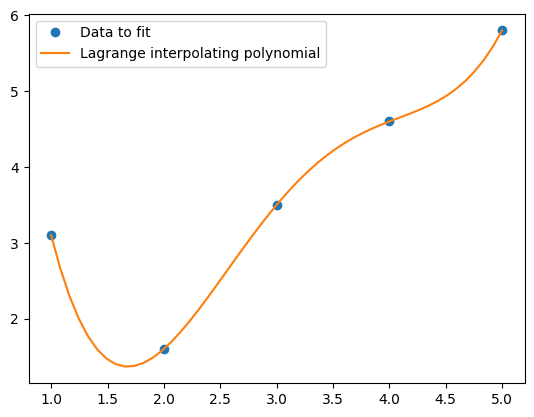

In [26]:
def p(x):
  """ returns the value of the interpolating polynomial,
  evaluated at a given point x """
  pol = 0
  for i in range(len(xData)):
    pol += yData[i] * L(x,i)
  return pol


plt.plot(xData,yData, 'o', label='Data to fit')

xGrid = np.linspace(1,5,50) # for plotting
plt.plot( xGrid, p(xGrid), label='Lagrange interpolating polynomial')
plt.legend()
plt.show()

## Part 2: Node locations
Consider the function $f(x) = e^{-5x^2}$ on the interval $[-1,1]$, and take $n+1$ nodes on $[-1,1]$. Evaluate $f$ on these nodes to get the $y$ values.  Using the $x$ and $y$ data, create the interpolating polynomial $p(x)$ using `scipy.interpolate.BarycentricInterpolator`

1. Do this for **equally spaced** nodes, e.g., `np.linspace(-1,1,n+1)`
2. Repeat this for the following **unequally** spaced nodes: $x_j = \cos(\frac{j\pi}{n})$ for $j=0,1,\ldots,n$. (These are the "Chebyshev points" used in [Clenshaw-Curtis quadrature](https://epubs.siam.org/doi/epdf/10.1137/060659831))

Do this for $n=9$ (so 10 points total)

In both cases, make a plot of:
1. the data and both interpolants $p(x)$
2. the error between the original function $f(x)$ and both interpolants $p(x)$
For the plot, evaluate on a fine grid, e.g., 200 equally spaced points between $[-1,1]$

Answer the following questions:
1. For **equally spaced nodes**, where is most of the error located (in terms of $x$ values), e.g., near the center? near the edges?
2. If you make $n=19$, compare the maximum error $f(x)-p(x)$ for both cases. Which type of nodes (equally spaced or unequally spaced) has less error?

In [ ]:
a, b = -1, 1
f = lambda x : np.exp(-5*x**2)

n = 9
... todo ...

In [ ]:
# Repeat, but for larger n
n     = 19
... todo ...

## Part 3: Error formulas for different types of functions
If $p_n$ is the interpolating polynomial on $n+1$ nodes $\{x_0,x_1,\ldots,x_n\}$ then we have the Lagrange remainder formula

$$f(x) - p_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (x-x_i)$$
for some $\xi$ in between the nodes. (See our notes, or our book, or [wikipedia: "Interpolation error: Lagrange remainder formula"](https://en.wikipedia.org/wiki/Polynomial_interpolation#Interpolation_error:_Lagrange_remainder_formula))

### Part 3a
Compare the error, using three different "$f$" functions:
1. $f(x)=e^{-x}$
2. $f(x) = \frac{1}{1+x^2}$
3. $f(x)=|x|$

on $[-5,5]$ using $n+1$ **equispaced nodes**. To find the polynomial interpolant, use the `scipy.interpolate.BarycentricInterpolator` function again.

Record and the maximum error, $\max_{x\in[-5,5]} |f(x)-p(x)|$, for each choice of $f$ and its respective interpolant.  (You don't need to calculate this error exactly, just approximate it by evaluating $f(x)-p(x)$ on a dense grid of $x$ points, e.g., 200 $x$ values in $[-5,5]$ is plenty).

Record this max error as a function of $n$, for $n=1,2,\ldots,20$.

(You may find it helpful to plot $f(x)$ and $p(x)$ if you like)

In [ ]:
a, b = -5, 5

f1 = lambda x : np.exp(-x)
f2 = lambda x : 1/(1+x**2)
f3 = lambda x : np.abs(x)

... todo! ...

### Part 3b: try the Chebyshev nodes
In our formula for the error, we have the term
$$f(x) - p_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i=0}^n (x-x_i)$$

We don't have control over $\xi$, but if we want to place nodes $n+1$ nodes $x_i$ in the interval $[-a,a]$, we could try to do so in a manner to minimize
$$\max_{x\in[-a,a]} \left| \prod_{i=0}^n (x-x_i) \right|.$$
Doing this leads to the Chebyshev nodes (scaled by $a$) that we already saw.

So let's repeat 3a but this time use Chebyshev nodes instead of uniform nodes. Does this help?

In [ ]:
... todo ...

## Part 4: Generalized Vandermonde matrices for different bases

For each of the three sets of polynomial bases (monomials, Lagrange polynomials, and Newton polynomials), we have provided code below to generate a list that contains the polynomial functions of that basis.  (Note: you can also define the shifted monomial basis easily using the regular monomial basis)

Your job is to create the Vandermonde matrix (for the given nodes `xData`), and then find the coefficients by solving the linear system, and then using those coefficients to create the final interpolating polynomial.

In [ ]:
n     = 5
xData = np.linspace(10,11,n+1)
f     = lambda x : np.exp(-x)
yData = f(xData)

def createMonomialBasis(n):
    basis = []
    for k in range(n+1):
        # due to Python's "late binding" we have to do some tricks
        # See https://stackoverflow.com/a/2295372, https://stackoverflow.com/q/3431676
        basis.append(  lambda z,k=k : z**k )
    return basis

def createLagrangeBasis(n, xData):
    basis = []
    for k in range(n+1):
        def L_nk(x,k=k):
            y = 1.
            for j in range(k):
                y *= (x-xData[j])/( xData[k]-xData[j])
            for j in range(k+1,len(xData)):
                y *= (x-xData[j])/( xData[k]-xData[j])
            return y
        basis.append( L_nk )
    return basis

def createNewtonBasis(n,xData):
    basis = []
    for k in range(n+1):
        def L_nk(x,k=k):
            y = 1.
            for j in range(k):
                y *= (x-xData[j])
            return y
        basis.append( L_nk )
    return basis

def createVandermonde(xData,basis):
    # this is for you to implement
    ... todo! ...

# Then, for each basis, create the Vandermonde matrix, e.g.,
V_monomial = createVandermonde(xData, createMonomialBasis(n) )
with np.printoptions(precision=2,suppress=True):
    print('Monomial basis')
    print(V_monomial)
    kappa = np.linalg.cond(V_monomial)
    print(f'Condition number of Vandermonde matrix is {kappa:.2e}')
    # Rule-of-thumb: log10(kappa) is how many digits we lose when we
    # solve a system involving the matrix. So if kappa=1e12 and we work
    # in double precision with about 16 digits, we'd expect our answer to
    # only be accurate to about 4 digits. Not very good!

# For each basis, solve for the coefficients "c"
... todo ...

# And then create the polynomial interpolant using the coefficients and basis
... todo ...

# If you want to check that you have the right interpolant, compare with Scipy:
# We'll treat this as the "ground truth" (it's a stable formula, and presumably a bug-free implementation):
p     = scipy.interpolate.BarycentricInterpolator(xData,yData)

# ... and repeat the process for all the different bases ...

In [ ]:
# Sanity check using some of numpy's builtin polynomial functionality
from numpy.polynomial import Polynomial
from numpy.polynomial import polynomial as P

?P.polyvander

# and you can do something similar with the Chebyshev basis
# ?np.polynomial.chebyshev.chebvander
